In [ ]:
!jt -t chesterish

/bin/bash: jt: command not found


# Suffix Array

## Construction


In [ ]:

# naive algorithm O(n²)
def suffix_table (text:str):
    n = len(text)
    suffixes = []
    for i in range(n):
        suffix = text[i:]
        suffixes.append(suffix)
    suffixes.sort()

    table = []
    for suffix in suffixes:
        table.append(n - len(suffix))

    return table


suffix_table('CACGTACGTACTA')

[12, 1, 5, 9, 0, 2, 6, 10, 3, 7, 11, 4, 8]

In [ ]:
# Better Approach
# https://www.youtube.com/watch?v=_TUeAdu-U_k

def suffix_array(text:str):
  n = len(text)

  # convert text to list of ASCII Values
  text_values = [ord(text[x]) - ord('A') for x in range(n)]

  main_vals = text_values
  b = len(main_vals) != len(set(main_vals))
  i= 1
  while b:

    # extract a set of tuples, each tuples representing the first two characters of each suffix
    two_tuples = [(main_vals[i],main_vals[i+1] if i+1 < n else -1) for i in range(n)]


    # sorting the list of tuples and assigning ranks
    sorted_tuples = sorted(two_tuples)
    
    # convert tuples to their ranking
    conversion_dict = {}

    for x in range(len(sorted_tuples)):
      if x - 1 < 0 or (sorted_tuples[x-1] != sorted_tuples[x]):
        conversion_dict[sorted_tuples[x]] = x
    
    # construct a list of the tuple's ranking as our new array order
    main_vals = [conversion_dict[x] for x in two_tuples]

    b = len(main_vals) != len(set(main_vals))
    i+=1
  
  # now all the values of main_vals are unique
  
  output = [-1 for x in range(len(main_vals))]
  for i in range(len(main_vals)):
    output[main_vals[i]] = i
  
  return output

suffix_array('CACGTACGTACTA')

##Search


In [ ]:
def search_with_suffix(text:str, pattern:str, suffixes:list):
  # defining lengths
  n = len(text)
  m = len(pattern)

  # defining the beginning and end indicies
  d = 0
  f = n -1

  while d < f:
    middle = int((d + f) /2)
    # print(f'd = {d}, f = {f} ')
    # print(f'middle is {middle} => {suffixes[middle]}')
    # print(f'is  {pattern} < {text[suffixes[middle]:]}')
    if pattern <= text[suffixes[middle]:]:
      f = middle
    else:
      d = middle + 1
  # print(f'first d = {d} and f = {f}')
  deb = d

  f = n -1
  while d < f:
    middle = int((d + f) /2)
    # print(f'd = {d}, f = {f} ')
    # print(f'middle is {middle} => {suffixes[middle]}')
    # print(f'is  {pattern} = {text[suffixes[middle]:suffixes[middle] + m]}')
    if pattern == text[suffixes[middle]: suffixes[middle] + m]:
      d = middle +1
    else:
      f = middle -1
#   print(f'second d = {d} and f = {f}')
  fin = f
  if fin - deb == 1:
    return suffixes[deb: fin + 1]
  return suffixes[deb:fin]

In [ ]:
from pprint import pprint
text= 'CACGTACGTACTACACGTACGTACTACACGTACGTACTA'
sf_ar = suffix_array(text)
pprint([ (x,sf_ar[x],text[sf_ar[x]:]) for x in range(len(sf_ar))])
search_with_suffix(text,'TAC',suffix_array(text))

[(0, 38, 'A'),
 (1, 25, 'ACACGTACGTACTA'),
 (2, 12, 'ACACGTACGTACTACACGTACGTACTA'),
 (3, 27, 'ACGTACGTACTA'),
 (4, 14, 'ACGTACGTACTACACGTACGTACTA'),
 (5, 1, 'ACGTACGTACTACACGTACGTACTACACGTACGTACTA'),
 (6, 31, 'ACGTACTA'),
 (7, 18, 'ACGTACTACACGTACGTACTA'),
 (8, 5, 'ACGTACTACACGTACGTACTACACGTACGTACTA'),
 (9, 35, 'ACTA'),
 (10, 22, 'ACTACACGTACGTACTA'),
 (11, 9, 'ACTACACGTACGTACTACACGTACGTACTA'),
 (12, 26, 'CACGTACGTACTA'),
 (13, 13, 'CACGTACGTACTACACGTACGTACTA'),
 (14, 0, 'CACGTACGTACTACACGTACGTACTACACGTACGTACTA'),
 (15, 28, 'CGTACGTACTA'),
 (16, 15, 'CGTACGTACTACACGTACGTACTA'),
 (17, 2, 'CGTACGTACTACACGTACGTACTACACGTACGTACTA'),
 (18, 32, 'CGTACTA'),
 (19, 19, 'CGTACTACACGTACGTACTA'),
 (20, 6, 'CGTACTACACGTACGTACTACACGTACGTACTA'),
 (21, 36, 'CTA'),
 (22, 23, 'CTACACGTACGTACTA'),
 (23, 10, 'CTACACGTACGTACTACACGTACGTACTA'),
 (24, 29, 'GTACGTACTA'),
 (25, 16, 'GTACGTACTACACGTACGTACTA'),
 (26, 3, 'GTACGTACTACACGTACGTACTACACGTACGTACTA'),
 (27, 33, 'GTACTA'),
 (28, 20, 'GTACTACACGTACGTACTA'),

[24, 11, 30, 17, 4, 34, 21]

In [ ]:
print(suffix_array('CACGTACGTACTA'))
search_with_suffix('CACGTACGTACTA','TAC',suffix_array('CACGTACGTACTA'))

[12, 1, 5, 9, 0, 2, 6, 10, 3, 7, 11, 4, 8]


[4, 8]

In [ ]:
suffix_array('CACGTACGTACTA')[9:11]

[7, 11]

In [ ]:
from pprint import pprint
text = 'CACGTACGTACTA'
sf = suffix_array(text)
pprint([(i,sf[i],text[sf[i]:]) for i in range(len(sf))])
search_with_suffix(text,'CGT',sf)

[(0, 12, 'A'),
 (1, 1, 'ACGTACGTACTA'),
 (2, 5, 'ACGTACTA'),
 (3, 9, 'ACTA'),
 (4, 0, 'CACGTACGTACTA'),
 (5, 2, 'CGTACGTACTA'),
 (6, 6, 'CGTACTA'),
 (7, 10, 'CTA'),
 (8, 3, 'GTACGTACTA'),
 (9, 7, 'GTACTA'),
 (10, 11, 'TA'),
 (11, 4, 'TACGTACTA'),
 (12, 8, 'TACTA')]


[2, 6]

In [ ]:
text = 'GCATCGC'
print(suffix_array(text))
print([text[i:] for i in suffix_array(text) ])
search_with_suffix(text,'ATC',suffix_array(text))

[2, 6, 1, 4, 5, 0, 3]
['ATCGC', 'C', 'CATCGC', 'CGC', 'GC', 'GCATCGC', 'TCGC']


[]

#LCP Array (HTR)
Longest Common Prefix

In [ ]:
def lcp_length(s1:str, s2:str, n=0):
  """
  Recursive function to return 
  the length of the longest common prefix of two given strings
  """
  # if the current n character matches
  if s1[n] == s2[n]:
    # if we can't compare the following characters, we return one
    if n == len(s1)-1 or n == len(s2)-1:
      return 1
    # if we can compare the following characters, we compare them
    return 1 + lcp_length(s1,s2,n+1)
  # if this comparison failed, we return 0
  else:
    return 0

def lcp_lengths(strings:list, n=0):
  # initialize lengths
  m = len(strings)
  min_length = min([len(s) for s in strings])

  char_val = strings[0][n]
  i = 1

  while i < m and char_val == strings[i][n]:
    i+=1

  # if all strings have the same nth character  
  if i == m:
    # we check if the next character still falls under the min_length
    if n + 1 < min_length:
      # if it does, we recurse
      return 1 + lcp_lengths(strings, n+1)
    else:
      return 1
  else:
    # there's a mismatch
    return 0


def lcp_array(text:str,suff_arr:list, k= 2):
  # the first element of the lcp array is always undefined
  # so we set it to -1 because no length is -1
  output= [-1 for k in range(k-1)]
  # for each element in the suffix array
  for i in range(1,len(suff_arr)):
    # current suffix from the suffix array
    curr_suffix = text[suff_arr[i]:]

    # previous suffix from the suffix array
    prev_suffix = text[suff_arr[i-1]:]

    suffixes = [text[suff_arr[i-k]:] for k in range(k)]
    # appending the lcp length of the two
    output.append(lcp_lengths(suffixes))

  return output

In [ ]:
# testing lcp array

# lcp_array('CACGTACGTACTA',suffix_array('CACGTACGTACTA'))

# Tested with online example
# https://www.educative.io/edpresso/what-is-an-lcp-array
lcp_array('papaya',suffix_array('papaya'))

[-1, 1, 1, 0, 2, 0]

#LCS
Longest Common Substring

In [ ]:
def lcs(text:str):
  suff_arr = suffix_array(text)
  lcp_arr = lcp_array(text,suff_arr)

  max_len = -1
  indicies = []

  for i in range(len(lcp_arr)):
    if lcp_arr[i] > max_len:
      max_len= lcp_arr[i]
      indicies = [suff_arr[i]]
    else:
      if lcp_arr[i] == max_len:
        indicies.append(suff_arr[i])
  

  substrings = [text[i:i+max_len] for i in indicies]

  return substrings

In [ ]:
def lcs_v2(text:str):
  suff_arr = suffix_array(text)
  lcp_arr = lcp_array(text,suff_arr)
  
  # getting the max of lcp and it's first occurence
  max_len = max(lcp_arr)
  start = lcp_arr.index(max_len)
  indicies = []

  # iterating through the table from the first occurence of max
  i = start
  while i < len(lcp_arr):
    # if there's an equality we append the substring then
    # iterate until there isn't
    if lcp_arr[i] == max_len:
      indicies.append(suff_arr[i])
      j = i
      while lcp_arr[j] == max_len:
        j+=1
      i = j
    else:
      # if there's no equality we iterate
      i+=1  

  # acquire the substrings of indicies
  substrings = [text[i:i+max_len] for i in indicies]

  return substrings

In [ ]:
lcs_v2('CAGACGGAAGAGTGAACGACCCGACGT')

['CGAC', 'GACG']

In [ ]:
lcs('CAGACGGAAGAGTGAACGACCCGACGT')
# CAGACGGAAGAGTGAACGACCCGACGT

['CGAC', 'GACG']

#ITS Array

In [ ]:
def its_array(suff_arr:list):
  n = len(suff_arr)
  output = [-1 for i in range(n)]
  for i in range(n):
    output[suff_arr[i]] = i
  
  return output


In [ ]:
# testing course example
suff_arr = suffix_array('GATGATTGAG')
its_array(suff_arr)

[5, 1, 8, 6, 2, 9, 7, 4, 0, 3]

#Shortest Common substring
##List of Substring Lengths

In [ ]:
def subs_lengths(text:str):
  ts = suffix_array(text)
  its = its_array(ts)
  htr = lcp_array(text,ts)
  n = len(text)

  output=[]
  for i in range(n):
    first = htr[its[i]]
    second = htr[its[i]+1] if its[i] +1 < len(htr) else 0
    output.append( 1 + max( first,second ))
  output.append(1)
  return output

def scs(text:str):
  sl = subs_lengths(text)
  n = len(text)
  i = 0

  result = []
  while i + sl[i] <= n:
    if sl[i] <= sl[i + 1]:
      result.append(text[i:i + sl[i]])
    i+=1
  
  return result

In [ ]:
text = 'GATGATTGAG'
ts = suffix_array(text)
print(f'TS: {ts}')
print(f'ITS: {its_array(ts)}')
print(f'HTR: {lcp_array("GATGATTGAG",ts)} ')
sl = subs_lengths(text)
print(f'SL: {sl}')
print([text[i: i + sl[i]] for i in range(len(sl))])
scs(text)

TS: [8, 1, 4, 9, 7, 0, 3, 6, 2, 5]
ITS: [5, 1, 8, 6, 2, 9, 7, 4, 0, 3]
HTR: [-1, 1, 2, 0, 1, 2, 3, 0, 3, 1] 
SL: [4, 3, 4, 4, 3, 2, 4, 3, 2, 2, 1]
['GATG', 'ATG', 'TGAT', 'GATT', 'ATT', 'TT', 'TGAG', 'GAG', 'AG', 'G', '']


['ATG', 'TGAT', 'TT', 'AG']

#Répétitions super Maximales

In [ ]:
def rsm(text:str, alphabet_length=4):
  
  # first step, retrieve the substring w,
  # where w is represened by a local maximain the lcp array (HTR)

  # we retrieve both the suffix array
  # and lcp array
  ts = suffix_array(text)
  htr = lcp_array(text,ts)
  
  # this is our result of local maxes
  # each substring is the index and the value
  # is an array of his occuring indicies
  local_max = {}

  # this is a buffer registering the length of the prefix
  # our way to find the local minimum
  buff = htr[0]

  for i in range(len(htr)):

    # if we find that the current value is larger than our buffer
    # we assign it to our buffer
    if htr[i] > buff:
      buff = htr[i]

    # in the case of equality we do nothing,
    # however if the htr[i] is smaller, then
    # we would have found a local maxima
    else:
      if htr[i] < buff:
        # we now that the previous index is our maxima and we record k, the count of our word occurences
        j = i -1
        k = 1
        # we get our word using the suffix array
        w = text[ts[j]: ts[j] + buff]
        # we initialize the table containing the occurences of our w
        local_max[w] = []
        # for each value in htr[i] that belongs to our local minimum
        while htr[j] == buff:
          # we append its index to our array
          k+=1
          local_max[w].append(ts[j])
          j-=1
        # we also append the previous value to our local maxima
        # it's also an occurence based on the definition of htr
        local_max[w].append(ts[j])
        buff = htr[i]
        # if there's more than alphabet_length occurences then the suffixes
        # and prefixes can't be unique
        if k > alphabet_length:
          local_max.pop(w)
        
    
    # local max dictionary containing all the W
    # and their occurences
    
    # TODO: finish excluding the rest
    rsm_values = {}
    for word in local_max:
      prefs = []
      suffs = []
      for idx in local_max[word]:
        pref_index = idx -1
        if pref_index >= 0:
          prefs.append(text[pref_index])
        
        suff_index = idx + len(word)
        if suff_index < len(text):
          suffs.append(text[suff_index])
      
      if len(prefs) == len(set(prefs)) and len(suffs) == len(set(suffs)):
        rsm_values[word] = local_max[word]
      

  return rsm_values

In [ ]:
def rsm_v2(text:str, alphabet_length = 4):
  
  # first step, retrieve the substring w,
  # where w is represened by a local maximain the lcp array (HTR)

  # we retrieve both the suffix array
  # and lcp array
  ts = suffix_array(text)
  htr = lcp_array(text,ts)
  
  # this is our result of local maxes
  # each substring is the index and the value
  # is an array of his occuring indicies
  local_max = {}

  # this is a buffer registering the length of the prefix
  # our way to find the local minimum
  buff = htr[0]

  for i in range(len(htr)):

    # if we find that the current value is larger than our buffer
    # we assign it to our buffer
    if htr[i] > buff:
      buff = htr[i]
      # a larger substring is found, we record the beggining of it's occurence
      start = i

    # in the case of equality we do nothing,
    # however if the htr[i] is smaller, then
    # we would have found a local maxima
    else:
      if htr[i] < buff:
        # we set the end of it's occurences
        end = i -1
        # get it's occurences from the suffix array
        if end - start <= 1:
          occurences = ts[start: end +1]
        occurences = ts[start:end]

        # get the word
        w = text[ts[end]: ts[end] + buff]

        # if the number of occurences is larger than the alphabet length
        # there is no way the suffixes and prefixes are unique, so we exclude that case
        if len(occurences) <= alphabet_length:
          local_max[w] = []        
          # for each value in htr[i] that belongs to our local minimum
          while htr[end] == buff:
            # we append its index to our array
            local_max[w].append(ts[end])
            end-=1
          # we also append the previous value to our local maxima
          # it's also an occurence based on the definition of htr
          local_max[w].append(ts[end])
          buff = htr[i]
    
    # local max dictionary containing all the W
    # and their occurences
    
    # TODO: finish excluding the rest
    rsm_values = {}
    for word in local_max:
      prefs = []
      suffs = []
      for idx in local_max[word]:
        pref_index = idx -1
        if pref_index >= 0:
          prefs.append(text[pref_index])
        
        suff_index = idx + len(word)
        if suff_index < len(text):
          suffs.append(text[suff_index])
      
      if len(prefs) == len(set(prefs)) and len(suffs) == len(set(suffs)):
        rsm_values[word] = local_max[word]
      

  return rsm_values

In [ ]:
'GATAAGATTGATG'[0+3]

'A'

In [ ]:
rsm('GATAAGATTGATG')

{'GAT': [5, 9, 0], 'TG': [8, 11]}

In [ ]:
rsm_v2('GATAAGATTGATG')

{'GAT': [5, 9, 0], 'TG': [8, 11]}

#Data Analysis


In [ ]:
# imoprting dependencies
import pandas as pd
print(pd.__version__)

1.1.5


In [ ]:
# defining the Data Shape
needle_lengths = [4, 8, 12, 20, 30, 50]
haystack_lengths = [1000, 2000, 6000, 10000, 20000, 60000, 80000, 100000]
importData=False

In [ ]:
# Function for generating random dna Sequences
from random import randint
def generate_dna(length: int):
        ADN = ''
        for i in range(0,length):
            ADN+='ACGT'[randint(0,3)]
        return ADN

# Generate random dna sequences from a larger text
def generate_from(text:str, length:int):
  start = randint(0,len(text) - length)
  return text[start:start+length]

In [ ]:
# Generating the Haystacks
def generate_haystacks():
  dnaList = []
  lengthsList = []
  for y in haystack_lengths:
    for x in range(10):
      dnaList.append(generate_dna(y))
      lengthsList.append(y)
  return (dnaList, lengthsList)
if not importData:
  # haystacks = pd.Series([generate_dna(y) for y in haystack_lengths])
  data = generate_haystacks()
  dataset = pd.DataFrame({'haystack':data[0],'haystack_length':data[1]})


In [ ]:
dataset

,haystack,haystack_length
0,AAGGCAGTTAATGCCGTTGTCGCCTTTTATGATAATAAAAGACTAT...,1000
1,CGTTCGTCCATCTACCGTCGAAATAACAGACAATACATGGGTCCTG...,1000
2,TTAAGGGCCAACACCCCTGGGTGCATATCTGACCCATACGATACGC...,1000
3,TGCGGGTGTCCCTTGTAATGATCCAGCGCAGGGAAGGTCCCAGCAA...,1000
4,ATCTCGTTCTGTGTGGGTGAACGCGGGCGTGCGGATGGTTGACCTG...,1000
...,...,...
85,AAGAGCGCTCCCGACAGCAAAGAAGGCGGAGCTTATTTCCGCACGG...,200000
86,CGTCGTGCGCACCACGCGGGGAGTAGTACAACGCTGGACCCCCATT...,200000
87,CAGGAGCTTTCACCCCCAGGGTCGTTGGTCGGATGGAGATACATTC...,200000
88,GAGGGGGAAACGAGGTATAACCGCCAGAAGCTGGCTAAACGAGCAG...,200000


In [ ]:
# indexing the haystack

def generate_suffix_array(row):
  text = row['haystack']
  import time
  start_naive_time = time.perf_counter_ns()
  suff_arr = suffix_table(text)
  end_naive_time = time.perf_counter_ns()

  # start_smarter_time = time.perf_counter_ns()
  # suffix_array(text)
  # end_smarter_time = time.perf_counter_ns()

  # return (end_naive_time - start_naive_time,
  #         suff_arr,
  #         end_smarter_time - start_smarter_time)
  return (end_naive_time - start_naive_time,
          suff_arr)

dataset[['naive_time' ,'suffix_array']] = dataset.apply(generate_suffix_array, axis=1, result_type='expand')

In [ ]:
dataset[[ 'haystack_length', 'naive_time' ,'suffix_array']].head()

In [ ]:
# generating the needles
if not importData:
  dataset['needle'] = dataset.apply(lambda row: [generate_from(row['haystack'], length) for length in needle_lengths], axis=1)
  dataset = dataset.explode('needle')

In [ ]:
dataset['needle_length'] = dataset.apply(lambda row: len(row['needle']),axis=1)

In [ ]:
dataset.head()

In [ ]:
# testing the suffix array search

def search_time(row):
    
    needle = row['needle']
    haystack = row['haystack']
    suff_arr = row['suffix_array']
    
    import time
    startTime = time.perf_counter_ns()
    search_with_suffix(haystack, needle, suff_arr)
    endTime = time.perf_counter_ns()
    return endTime - startTime

In [ ]:
# dataset['time_suffix_search'] = 

# dataset.assign(**testing_suffix_array_search())
needle_row_names = [f'needle_{x}' for x in needle_lengths]

dataset['search_time'] = dataset.apply(lambda row: search_time(row), axis=1)

In [ ]:
dataset.head()

##Data Visualization

### Suffix array Construction

In [ ]:
# Plotting the Execution Time of the four algorithms

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

plt.scatter(dataset['haystack_length'],dataset['smarter_time'],label='Approche Efficace')
plt.scatter(dataset['haystack_length'],dataset['naive_time'],label='Approche Naîve')

motifs = ','.join([str(n) for n in needle_lengths])

plt.title(f'Suffix array construction time ')
# Set the y axis label of the current axis.
plt.xlabel('Taille du Texte')
plt.ylabel('Temps d\'éxécution')
# show a legend on the plot
plt.legend()

fig1 = plt.gcf()
# Display a figure.
plt.show()
fig1.savefig(f'Graph.png')

### Search performance

In [ ]:
size_data = dataset[dataset.haystack_length == 1000]
size_data['needle_length'].unique()

array([ 4,  8, 12, 20, 30, 50])

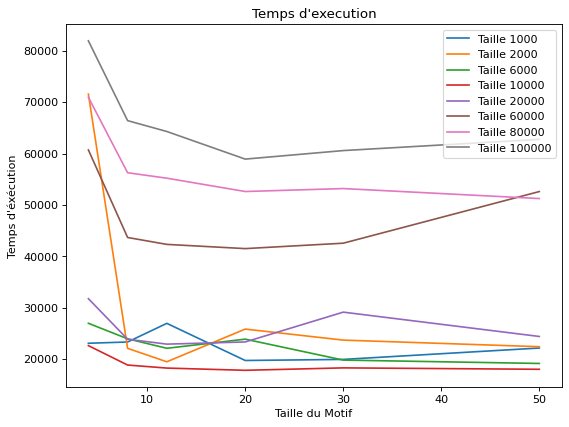

In [ ]:
# Plotting the Execution Time of the four algorithms

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

for haysize in dataset['haystack_length'].unique():
  size_data = dataset[dataset.haystack_length == haysize]
  # plt.scatter(size_data['needle_length'],size_data['search_time'],label=f'Taille {haysize}')
  plt.plot(size_data['needle_length'].unique(),size_data.groupby('needle_length').mean()['search_time'],label=f'Taille {haysize}')
# plt.plot(dataset['haystack_length'],dataset['naive_time'],label='Approche Naîve')

# motifs = ','.join([str(n) for n in needle_lengths])

plt.title(f'Temps d\'execution')
# Set the y axis label of the current axis.
plt.xlabel('Taille du Motif')
plt.ylabel('Temps d\'éxécution')
# show a legend on the plot
plt.legend()

fig1 = plt.gcf()
# Display a figure.
plt.show()
fig1.savefig(f'Graph.png')

#haw wch lazem dir

In [ ]:
from	bisect	import	bisect_left,	bisect_right

text	= 'CACGTACGTACTA'
#create the suffixes table
suffixes= sorted([text[i:]	for	i	in range(len(text))]) 

#search of needle if exist in the text using 'devision du tableau par deux' "only 1 occurence"
st,	en	=	bisect_left(suffixes,	'TA'), bisect_right(suffixes,	'TA')   

print(st,	en)
print(suffixes)

10 11
['A', 'ACGTACGTACTA', 'ACGTACTA', 'ACTA', 'CACGTACGTACTA', 'CGTACGTACTA', 'CGTACTA', 'CTA', 'GTACGTACTA', 'GTACTA', 'TA', 'TACGTACTA', 'TACTA']
